In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Image Gradent

In [2]:
img = cv.imread('../images/sudoku.png', 0)

In [3]:
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)
laplacian = cv.Laplacian(img, cv.CV_64F)

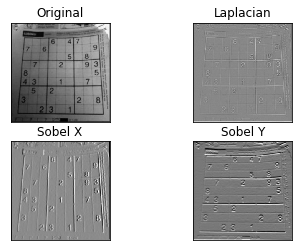

In [4]:
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

### 使用CV_8U会出现由白过度到黑时梯度为负，转为np.uint8时会被替换为0,从而出现边界消失 ，可以使用更高形式的数据类型如cv.CV_16S, cv.CV_64F

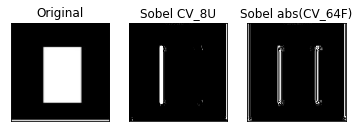

In [5]:
img = cv.imread('../images/box.png',0)
img = cv.GaussianBlur(img, (3,3), 1)
# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)


plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

# Canny Edge Detecion

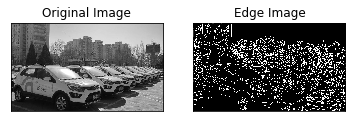

In [6]:
img = cv.imread('../images/car.png', 0)
edges = cv.Canny(img,50,100)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Image Pyramids

In [7]:
cad = cv.imread('../images/cad.png')
cad.shape

(1098, 1417, 3)

In [8]:
low = cv.pyrDown(cad)
low.shape

(549, 709, 3)

In [9]:
cv.imshow('low', low)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
high = cv.pyrUp(low)
high.shape

(1098, 1418, 3)

In [11]:
cv.imshow('high', high)
cv.waitKey(0)
cv.destroyAllWindows()